In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Load dataset
df = pd.read_excel('airpoll spreadsheet.xlsx')
df 

,SO2,NO2,O3,PM2.5,PM10
0,12.066771,26.209577,50.274385,30.133367,49.601856
1,9.960118,26.414410,50.725530,39.431072,63.532406
2,13.042188,28.175000,59.656341,30.048178,51.604358
3,14.110423,30.427946,45.042525,35.744039,59.892717
4,16.469369,25.970691,46.352582,22.802231,39.986833
...,...,...,...,...,...
3342,12.821386,29.930362,45.131497,28.474811,46.540878
3343,14.980377,30.627038,47.514893,31.570400,49.137089
3344,10.085431,27.854523,57.197097,38.671100,52.522028
3345,9.124214,28.639587,43.391786,28.505417,48.034397


DATA PREPROCESSING

In [3]:
#checking null values
nulval = df.isnull().values.any()
print(nulval)

False


In [4]:
#Removing duplicates 
df.drop_duplicates(inplace = True)

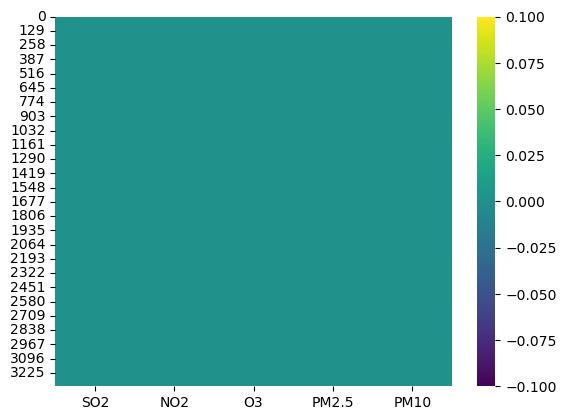

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar = True, cmap = 'viridis')
plt.show()

In [6]:
#Handling outliers 

# Define function to cap outliers
def cap_outliers(x, lower_bound, upper_bound):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x

# Loop through each numeric column and apply outlier capping
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers in place
    df[col] = df[col].apply(lambda x: cap_outliers(x, lower_bound, upper_bound))

In [7]:
#Names of the columns in the original data 
names = ['SO2', 'NO2', 'O3','PM2.5','PM10']
#copying data from original data frame 
features = df[names].copy()

features.head(10)

,SO2,NO2,O3,PM2.5,PM10
0,12.066771,26.209577,50.274385,30.133367,49.601856
1,9.960118,26.414410,50.725530,39.431072,63.532406
2,13.042188,28.175000,59.656341,30.048178,51.604358
3,14.110423,30.427946,45.042525,35.744039,59.892717
4,16.469369,25.970691,46.352582,22.802231,39.986833
5,18.489074,26.096799,44.781528,24.131950,42.332128
6,18.127173,30.434282,47.132010,31.886344,55.359569
7,12.894506,29.311126,49.712599,32.989322,56.235550
8,15.816965,30.984227,51.130147,37.649058,63.500050
9,19.102044,24.190507,43.982212,32.053747,51.604747


In [8]:

from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler scales each feature to a given range, typically [0, 1] by default
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
scaled_features = scaler.fit_transform(features[names])

# Converting the scaled array back into a DataFrame
scaled_features = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

# Displaying the scaled DataFrame
scaled_features


,SO2,NO2,O3,PM2.5,PM10
0,0.312006,0.435103,0.500221,0.471905,0.423968
1,0.243728,0.439397,0.506496,0.663620,0.582984
2,0.343621,0.476303,0.630704,0.470148,0.446827
3,0.378243,0.523529,0.427458,0.587595,0.541438
4,0.454699,0.430096,0.445678,0.320739,0.314213
...,...,...,...,...,...
3342,0.336464,0.513099,0.428695,0.437706,0.389027
3343,0.406439,0.527702,0.461843,0.501536,0.418663
3344,0.247789,0.469585,0.596501,0.647950,0.457302
3345,0.216635,0.486041,0.404500,0.438337,0.406076


EXPLORATION DATA ANALYSIS 

In [9]:
#stastitics
df.describe()

,SO2,NO2,O3,PM2.5,PM10
count,3347.000000,3347.000000,3347.000000,3347.000000,3347.000000
mean,15.204665,30.056141,49.027532,30.601013,52.849766
std,7.130806,9.307733,13.622127,10.172126,18.866071
min,2.440214,5.452842,14.307370,7.247189,12.460333
25%,9.822467,23.342326,38.955383,23.265236,39.293278
50%,13.668863,28.622035,47.986737,29.131225,49.776500
75%,19.211052,35.268649,57.857050,36.256992,63.601911
max,33.293929,53.158133,86.209550,55.744625,100.064861


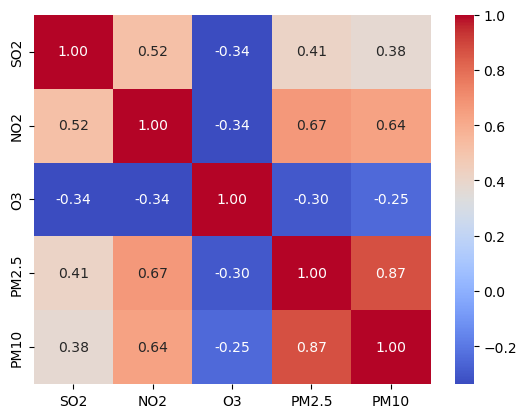

In [10]:
#Correlation
corr = df.corr()
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

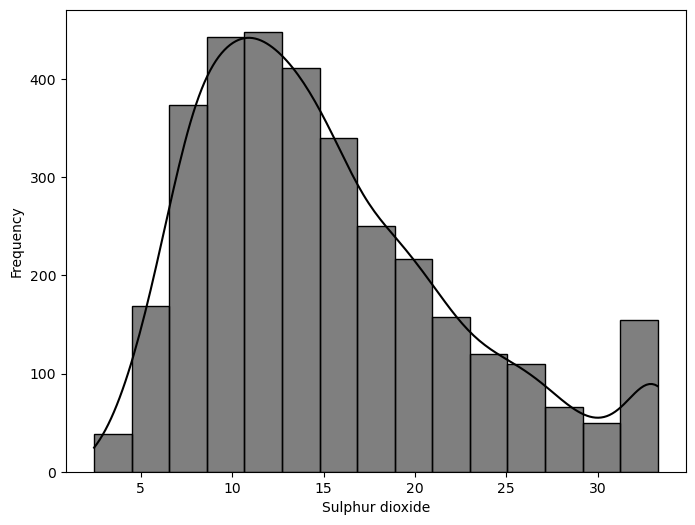

In [11]:
#Distribution of so2.png

plt.figure(figsize=(8,6))
sns.histplot(df['SO2'], bins = 15, kde = True, color = 'black')
plt.xlabel('Sulphur dioxide')
plt.ylabel('Frequency')
plt.grid(False)
#plt.title('Distribution of SO2')
plt.savefig('Sulphur dioxide.png')
plt.show()

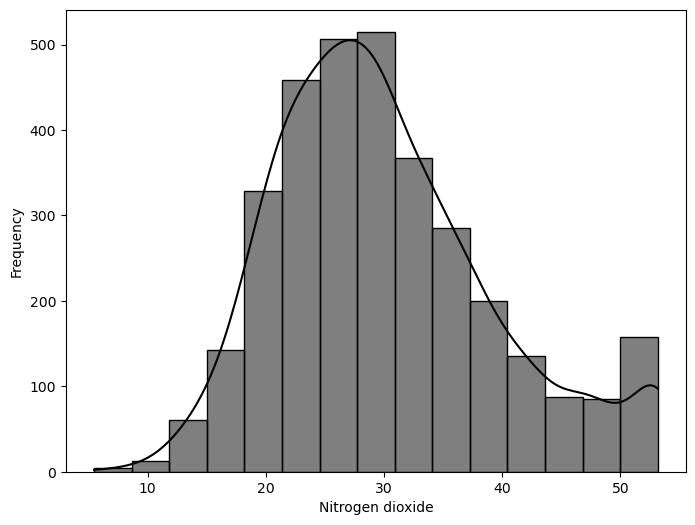

In [12]:
#Distribution of No2.
plt.figure(figsize=(8,6))
sns.histplot(df['NO2'], bins = 15, kde = True, color = 'black')
plt.xlabel('Nitrogen dioxide')
plt.ylabel('Frequency')
#plt.title('Distribution of NO2')
plt.grid(False)
plt.savefig('Nitrogen dioxide.png')
plt.show()

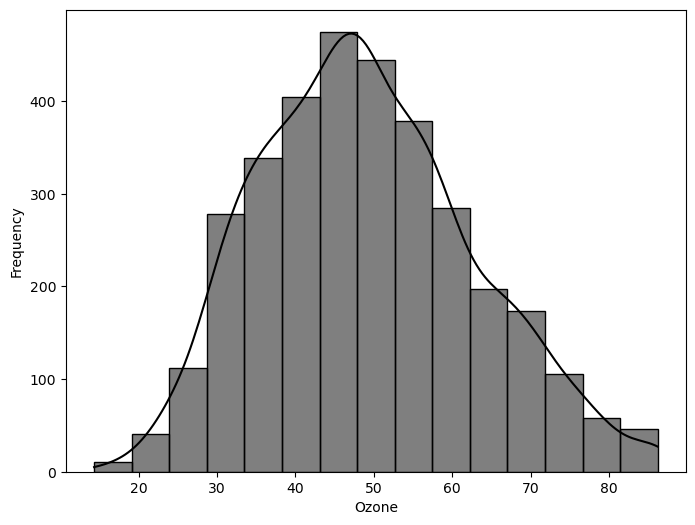

In [13]:
#Distribution of O3

plt.figure(figsize=(8,6))
sns.histplot(df['O3'], bins = 15, kde = True, color = 'black')
plt.xlabel('Ozone')
plt.ylabel('Frequency')
#plt.title('Distribution of O3')
plt.grid(False)
plt.savefig('Ozone.png')
plt.show()

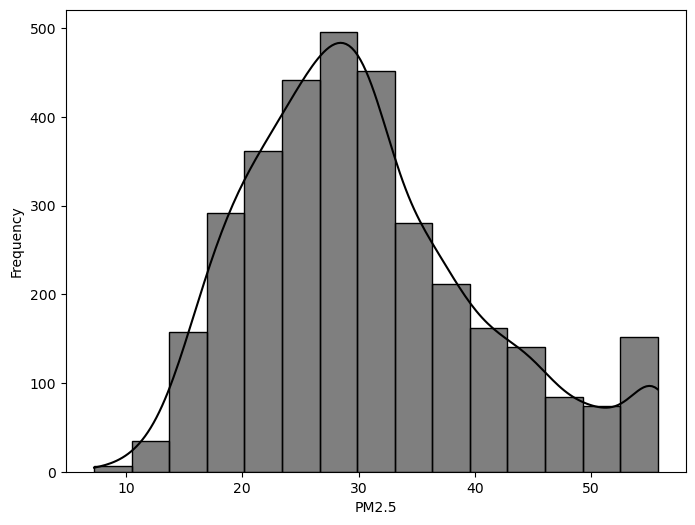

In [14]:
#Distribution of PM2.5

plt.figure(figsize=(8,6))
sns.histplot(df['PM2.5'], bins = 15, kde = True, color = 'black')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
#plt.title('Distribution of PM2.5')
plt.grid(False)
plt.savefig('PM2.5.png')
plt.show()

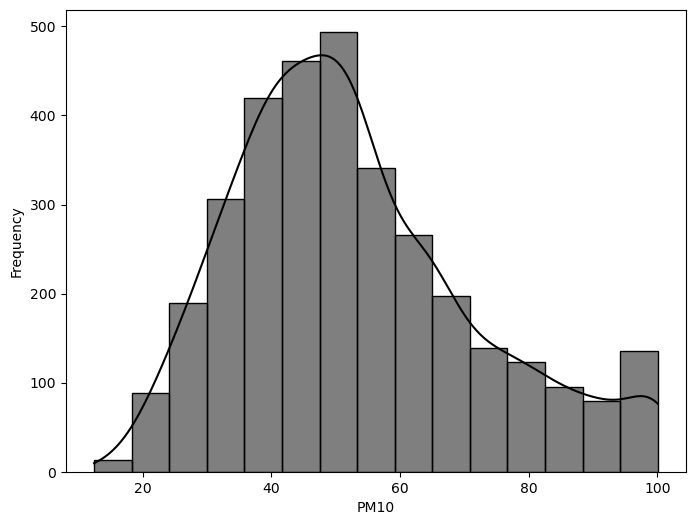

In [15]:
#Distribution of PM10

plt.figure(figsize=(8,6))
sns.histplot(df['PM10'], bins = 15, kde = True, color = 'black')
plt.xlabel('PM10')
plt.ylabel('Frequency')
#plt.title('Distribution of PM10')
plt.grid(False)
plt.savefig('PM10.png')
plt.show()

OPTIMAL NUMBER OF CLUSTER USING THE ELBOW METHOD 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Use only the pollutant columns for clustering

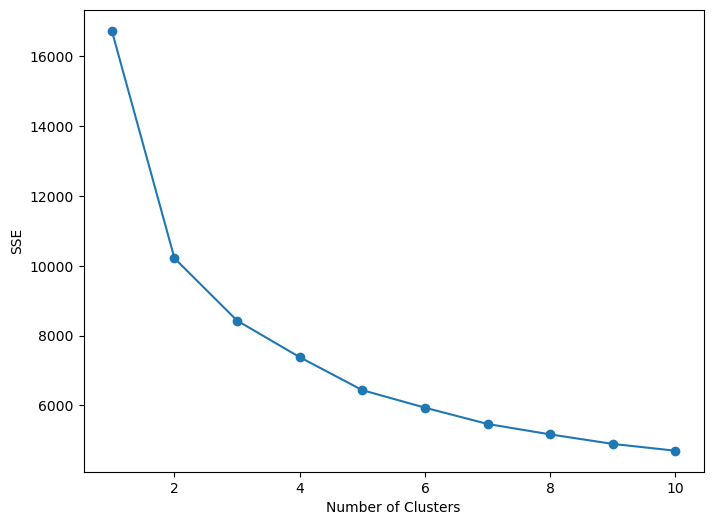

In [17]:
from sklearn.cluster import KMeans

# Elbow method to find the ideal number of clusters
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
#plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(False)
plt.savefig('SSE.png')
plt.show()

In [18]:
optimal_k = 3 #number of clusters
km= KMeans(n_clusters = optimal_k, random_state = 42)
df['Cluster'] = km.fit_predict(scaled_data)

EXPORTING DATA TO EXCEL 

In [19]:
df.to_csv("Clustered_data.csv", index = False)

DIMENSIONALITY REDUCTION USING PCA AND CLUSTERING VISUALIZATION

In [20]:
# Visualize the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

optimal_k = 3 #number of clusters
km= KMeans(n_clusters = optimal_k, random_state = 42)
clusters = km.fit_predict(pca_data)


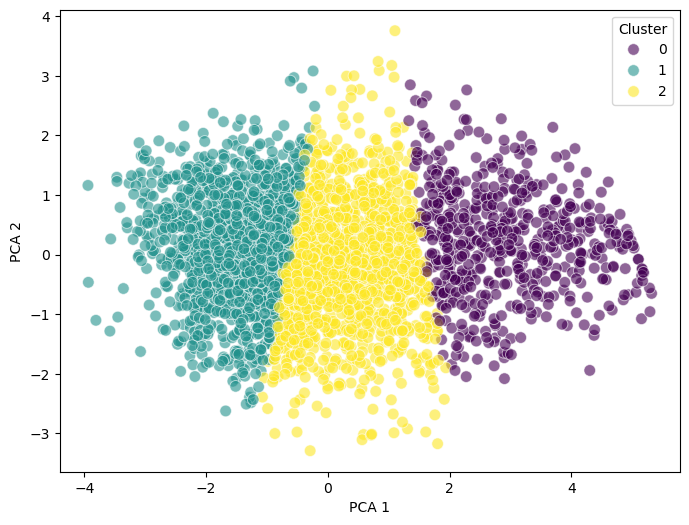

In [21]:
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=70, alpha=0.6) # alpha=0.6: transparency of the points
#plt.title('K-Means Clustering Results (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(False) # Disable the grid on the plot
plt.savefig('PCA.png')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_data, df['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3483050111117603
